# Analysing Sentiment: A Multi-Model Approach to frequencies

In [1]:
# Importing the data
import pandas as pd

speeches_data = pd.read_csv('all_speeches_scores.csv')


# View DataFrame. 
speeches_data

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,vader_polarity,lm_polarity,finbert_polarity
0,r980915a_BOE,United Kingdom,1998-09-15,Speech,George,False,"Thank you, Chairman. I'm actually very pleased...",BOE,Bank of England,1998,en,thank chairman actually pleased opportunity re...,0.9968,-0.418182,0.156484
1,r981021b_BOE,United Kingdom,1998-10-21,Britain in Europe,George,False,It's a great pleasure to be here in the beauti...,BOE,Bank of England,1998,en,great pleasure beautiful city bruges honoured ...,0.9999,-0.100529,0.503388
2,r981021a_BOE,United Kingdom,1998-10-21,Impact of the recent turbulence in internation...,King,True,Few industries have suffered more from volatil...,BOE,Bank of England,1998,en,industries suffered volatility british economy...,0.9982,-0.372549,-0.290759
3,r981101a_BOE,United Kingdom,1998-11-01,"Economic policy, with and without forecasts",Budd,False,My topic this evening is the use of forecasts ...,BOE,Bank of England,1998,en,topic evening use forecasts economic general u...,0.9997,-0.142857,0.014395
4,r981101b_BOE,United Kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,Vickers,False,"Six years ago this week, sterling left the exc...",BOE,Bank of England,1998,en,six years ago week sterling left exchange rate...,0.9988,-0.406593,0.014357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r221007a_BOE,United Kingdom,2022-10-07,"Shocks, inflation, and the policy response",Ramsden,False,Thank you very much for the invitation to spea...,BOE,Bank of England,2022,en,thank much invitation speak today one nine mem...,0.9947,-0.525180,-0.458917
1205,r221012a_BOE,United Kingdom,2022-10-12,Monetary policy: an anchor in challenging times,Pill,False,Huw Pill talks about how we will bring inflati...,BOE,Bank of England,2022,en,huw pill talks bring inflation acted stabilise...,0.9997,-0.166667,-0.023917
1206,r221015a_BOE,United Kingdom,2022-10-15,Monetary policy and financial stability interv...,Bailey,True,We are meeting in the most difficult of times....,BOE,Bank of England,2022,en,meeting difficult times saying start recognisi...,-0.9848,-0.600000,-0.393178
1207,r221019a_BOE,United Kingdom,2022-10-19,"Governance of “Decentralised” Finance: Get up,...",Wilkins,False,"These are divided into seven categories, suffr...",BOE,Bank of England,2022,en,divided seven categories suffrage systems whos...,0.9999,0.287234,0.014387


# Sorting by top 20 pos/neg speeches for three models (Vader, LM, FinBERT)

- TextBlob proved too neutral across the date range to provide any actionable insights. 

#### top 20 most positive Vader speeches

In [2]:
# Sorting by top 20 most positive Vader speeches
vader_positive = speeches_data.sort_values(by='vader_polarity', ascending=False)

vader_positive.head(20)

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,vader_polarity,lm_polarity,finbert_polarity
655,r140912a_BOE,United Kingdom,2014-09-12,"In giving, how much do we receive? The social ...",Haldane,False,The views are not necessarily those of the Ban...,BOE,Bank of England,2014,en,views necessarily bank england monetary policy...,1.0,0.278431,0.027869
270,r070626a_BOE,United Kingdom,2007-06-26,"London, Money and the UK Economy",Gieve,False,The past year has been one of rapid growth and...,BOE,Bank of England,2007,en,past year one rapid growth record profits much...,1.0,0.012987,0.514069
1121,r210429b_BOE,United Kingdom,2021-04-29,Developments in the PRA’s supervision of annui...,Gerken,False,Asset eligibility Liability eligibility Calcul...,BOE,Bank of England,2021,en,asset eligibility liability eligibility calcul...,1.0,-0.425837,0.014431
265,r070502a_BOE,United Kingdom,2007-05-02,The MPC Ten Years On,King,True,"Not long before his untimely death, David Walt...",BOE,Bank of England,2007,en,long untimely death david walton invited deliv...,1.0,-0.177215,0.014367
657,r140930a_BOE,United Kingdom,2014-09-30,"Mensch tracht, und Gott lacht: Giving guidance...",Miles,False,"Mensch tracht, und Gott lacht"" is a Yiddish pr...",BOE,Bank of England,2014,en,mensch tracht und gott lacht yiddish proverb m...,1.0,-0.189189,0.014361
1181,r220526a_BOE,United Kingdom,2022-05-26,Four Rs: Creating the conditions for long-term...,Gerken,False,Asset eligibility Liability eligibility Calcul...,BOE,Bank of England,2022,en,asset eligibility liability eligibility calcul...,1.0,-0.425837,0.014431
967,r190221a_BOE,United Kingdom,2019-02-21,The creative economy,Haldane,False,It is a great pleasure to be at the Glasgow Sc...,BOE,Bank of England,2019,en,great pleasure glasgow school art gsa years gs...,1.0,0.035616,0.309892
1177,r220519a_BOE,United Kingdom,2022-05-19,Central clearing: three lessons and a path for...,Knowles,False,This publication is available on the BIS websi...,BOE,Bank of England,2022,en,publication available bis website iosco websit...,1.0,-0.396667,0.491870
659,r141001b_BOE,United Kingdom,2014-10-01,The economic impact of sterling's recent moves...,Forbes,False,Last summer I had the pleasure of seeing my fi...,BOE,Bank of England,2014,en,last summer pleasure seeing first play globe m...,1.0,0.091445,0.014172
855,r170320b_BOE,United Kingdom,2017-03-20,Productivity puzzles,Haldane,False,The views are not necessarily those of the Ban...,BOE,Bank of England,2017,en,views necessarily bank england monetary policy...,1.0,-0.153061,-0.053800


#### Top 20 most negative Vader speeches

In [3]:
# Sorting by top 20 most positive Vader speeches
vader_negative = speeches_data.sort_values(by='vader_polarity', ascending=True)

vader_negative.head(20)

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,vader_polarity,lm_polarity,finbert_polarity
1065,r200701a_BOE,United Kingdom,2020-07-01,Leading the change: climate action in the fina...,Breeden,False,Executive summary Insurance industry and clima...,BOE,Bank of England,2020,en,executive summary insurance industry climate c...,-1.0000,-0.508228,0.016229
831,r161123a_BOE,United Kingdom,2016-11-23,Uncertainty about Uncertainty,Forbes,False,"Uncertainty is the modern equivalent of a ""whi...",BOE,Bank of England,2016,en,uncertainty modern equivalent whipping boy eco...,-1.0000,-0.252632,-0.393596
1080,r200930a_BOE,United Kingdom,2020-09-30,Avoiding economic anxiety,Haldane,False,The views expressed here are not necessarily t...,BOE,Bank of England,2020,en,views expressed necessarily bank england monet...,-0.9999,-0.547170,-0.095218
1045,r200205a_BOE,United Kingdom,2020-02-05,Stress tests: a policymaker’s perspective,Kohn,False,"Simultaneous, transparent bank stress tests ar...",BOE,Bank of England,2020,en,simultaneous transparent bank stress tests one...,-0.9999,-0.393189,0.088854
330,r090213a_BOE,United Kingdom,2009-02-13,Why Banks Failed the Stress Test,Haldane,False,"By any historical standard, the financial cris...",BOE,Bank of England,2009,en,historical standard financial crisis past mont...,-0.9999,-0.475524,-0.213097
1076,r200909b_BOE,United Kingdom,2020-09-09,The financial “plumbing” committee,Stheeman,False,Introduction: the operational risk explosion ....,BOE,Bank of England,2020,en,introduction operational risk explosion bankin...,-0.9999,-0.421538,0.000808
1110,r210226a_BOE,United Kingdom,2021-02-26,The UK’s progress on resolvability,Ramsden,False,The Bank of England thanks the Treasury Commit...,BOE,Bank of England,2021,en,bank england thanks treasury committee opportu...,-0.9999,-0.225092,-0.288913
158,r030916a_BOE,United Kingdom,2003-09-16,Two Current Monetary Policy Issues,Nickell,False,"Two issues are considered, first the impending...",BOE,Bank of England,2003,en,two issues considered first impending switch t...,-0.9999,-0.470383,0.016221
1070,r200723a_BOE,United Kingdom,2020-07-23,Protecting economic muscle: Finance and the Co...,Brazier,False,Authorities around the world are taking action...,BOE,Bank of England,2020,en,authorities around world taking action halt sp...,-0.9999,-0.663347,-0.478013
982,r190507b_BOE,United Kingdom,2019-05-07,Financial stability post Brexit: risks from gl...,Cunliffe,False,Thank you for inviting me in January to speak ...,BOE,Bank of England,2019,en,thank inviting january speak today conference ...,-0.9998,-0.312500,-0.148845


#### Sorting by top 20 most postitve LM speeches

In [4]:
# Sorting by top 20 most positive LM speeches
lm_positive = speeches_data.sort_values(by='lm_polarity', ascending=False)

lm_positive.head(20)

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,vader_polarity,lm_polarity,finbert_polarity
68,r001002a_BOE,United Kingdom,2000-10-02,Dragon Awards Dinner,George,False,"Call me a masochist if you like, but I actuall...",BOE,Bank of England,2000,en,call masochist like actually enjoy job well le...,0.9999,0.773585,0.503442
111,r011129b_BOE,United Kingdom,2001-11-29,21st Century Markets,Plenderleith,False,I am delighted to have this opportunity to con...,BOE,Bank of England,2001,en,delighted opportunity contribute annual europe...,0.9999,0.666667,0.513259
1026,r190924a_BOE,United Kingdom,2019-09-24,Payments: A platform for innovation,Cleland,False,It is a great pleasure to be speaking today at...,BOE,Bank of England,2019,en,great pleasure speaking today payments infrast...,0.9999,0.621622,0.514327
1032,r191010a_BOE,United Kingdom,2019-10-10,Light is therefore Colour: Remarks at the laun...,No_Info,False,It is a pleasure to be back at Turner Contempo...,BOE,Bank of England,2019,en,pleasure back turner contemporary margate unve...,0.9997,0.588235,0.014366
568,r130426a_BOE,United Kingdom,2013-04-26,Remarks,King,True,Good morning everyone. I am delighted to welco...,BOE,Bank of England,2013,en,good morning everyone delighted welcome chartw...,0.9994,0.571429,0.005967
961,r181206a_BOE,United Kingdom,2018-12-06,Setting standards,Ramsden,False,Welcome all to today's ISO 20022 conference. I...,BOE,Bank of England,2018,en,welcome today iso conference iso produces lot ...,0.9999,0.561644,0.489747
1083,r201013a_BOE,United Kingdom,2020-10-13,Cross-border payments,Cleland,False,I was delighted to be invited to speak at this...,BOE,Bank of England,2020,en,delighted invited speak event exciting time ce...,0.9999,0.555556,0.514208
946,r180927a_BOE,United Kingdom,2018-09-27,Real-Time Gross Settlement (RTGS) Renewal: Ena...,Cleland,False,"Good morning, it is a pleasure to join you tod...",BOE,Bank of England,2018,en,good morning pleasure join today technology in...,0.9999,0.551020,0.514363
863,r170412a_BOE,United Kingdom,2017-04-12,Building the Infrastructure to Realise FinTech...,Carney,True,It's a pleasure to be in this historic setting...,BOE,Bank of England,2017,en,pleasure historic setting heart world leading ...,0.9996,0.540541,0.514065
1038,r191029a_BOE,United Kingdom,2019-10-29,Openness and integration,Ramsden,False,It is my great privilege to address you today....,BOE,Bank of England,2019,en,great privilege address today would like exten...,0.9999,0.534884,0.514170


#### Sorting by top 20 most negative LM speeches

In [5]:
# Sorting by top 20 most negative LM speeches
lm_negative = speeches_data.sort_values(by='lm_polarity', ascending=True)

lm_negative.head(20)

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,vader_polarity,lm_polarity,finbert_polarity
225,r060313a_BOE,United Kingdom,2006-03-13,The Budget of 1981 Was Over the Top,Nickell,False,"After the 1981 Budget, 364 university economis...",BOE,Bank of England,2006,en,budget university economists britain wrote com...,-0.9951,-0.750000,0.037561
704,r150313a_BOE,United Kingdom,2015-03-13,Financial Market Volatility and Liquidity,Salmon,False,As Executive Director for Markets at the Bank ...,BOE,Bank of England,2015,en,executive director markets bank england job ma...,0.9944,-0.729032,0.019514
317,r081013a_BOE,United Kingdom,2008-10-13,Prospects for the UK Economy and Challenges fo...,Sentance,False,The last month has seen a period of exceptiona...,BOE,Bank of England,2008,en,last month seen period exceptional unprecedent...,-0.9970,-0.681592,-0.485546
318,r081021a_BOE,United Kingdom,2008-10-21,Speech,King,True,My first memories of Leeds are from a wet summ...,BOE,Bank of England,2008,en,first memories leeds wet summer ten years old ...,-0.9673,-0.671642,-0.474038
848,r170213a_BOE,United Kingdom,2017-02-13,How to: MACROPRU. 5 principles for macropruden...,Brazier,False,It is an honour to be here at this LSE London ...,BOE,Bank of England,2017,en,honour lse london financial regulation seminar...,-0.9987,-0.664975,0.385194
520,r120606a_BOE,United Kingdom,2012-06-06,Resolution through the lens of corporate restr...,Gracie,False,All speeches are available online at Corporate...,BOE,Bank of England,2012,en,speeches available online corporate failures p...,-0.9989,-0.664865,-0.014519
1070,r200723a_BOE,United Kingdom,2020-07-23,Protecting economic muscle: Finance and the Co...,Brazier,False,Authorities around the world are taking action...,BOE,Bank of England,2020,en,authorities around world taking action halt sp...,-0.9999,-0.663347,-0.478013
1001,r190613a_BOE,United Kingdom,2019-06-13,Financial resilience and economic earthquakes,Brazier,False,"In the aftermath of the financial crisis, a ne...",BOE,Bank of England,2019,en,aftermath financial crisis new buzz phrase eme...,-0.9997,-0.661836,0.009673
1202,r220929b_BOE,United Kingdom,2022-09-29,Message received and understood,Ramsden,False,These are the minutes of the special Monetary ...,BOE,Bank of England,2022,en,minutes special monetary policy committee meet...,0.8133,-0.660900,-0.422025
939,r180713a_BOE,United Kingdom,2018-07-13,A little bit of stodginess?,Cunliffe,False,In my view both as a citizen and as a policyma...,BOE,Bank of England,2018,en,view citizen policymaker little stodginess cen...,0.9944,-0.654676,-0.414604


#### Sorting by top 20 most positive FinBERT speeches

In [6]:
# Sorting by top 20 most positive FinBERT speeches
finbert_positive = speeches_data.sort_values(by='finbert_polarity', ascending=False)

finbert_positive.head(20)

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,vader_polarity,lm_polarity,finbert_polarity
514,r120506a_BOE,United Kingdom,2012-05-06,On counterparty risk,No_Info,False,"Counterparty risk is unmonitorable example, Ba...",BOE,Bank of England,2012,en,counterparty risk unmonitorable example bank u...,-0.9943,-0.300000,0.995363
98,r010809a_BOE,United Kingdom,2001-08-09,The International Financial System: A New Part...,King,True,In a speech to mark the 20th anniversary of th...,BOE,Bank of England,2001,en,speech mark anniversary indian council researc...,0.9115,-0.304348,0.904296
426,r110218b_BOE,United Kingdom,2011-02-18,Global imbalances: the perspective of the Bank...,King,True,Greater features of the current regime. In the...,BOE,Bank of England,2011,en,greater features current regime recent crisis ...,0.9473,0.034483,0.888554
117,r020204a_BOE,United Kingdom,2002-02-04,Bankers Club/Guild Banquet,George,False,I explain it with my own pet theory of relativ...,BOE,Bank of England,2002,en,explain pet theory relativity based fact year ...,0.9967,0.125000,0.820342
918,r180413a_BOE,United Kingdom,2018-04-13,Slides from Mark Carney's speech at the Public...,No_Info,False,First lost decade of real wages since the mid-...,BOE,Bank of England,2018,en,first lost decade real wages since century lit...,0.9846,0.111111,0.518501
1138,r210617a_BOE,United Kingdom,2021-06-17,Central Bank Digital Currency: An update on th...,Mutton,False,We all tend to reach for the payment methods t...,BOE,Bank of England,2021,en,tend reach payment methods accustomed using fo...,0.9985,0.209302,0.514364
1134,r210601a_BOE,United Kingdom,2021-06-01,Tackling climate for real: the role of central...,Bailey,True,We all tend to reach for the payment methods t...,BOE,Bank of England,2021,en,tend reach payment methods accustomed using fo...,0.9985,0.209302,0.514364
386,r100318a_BOE,United Kingdom,2010-03-18,Prospects for Global Economic Recovery,Sentance,False,Over the three-and-a-half years I have spent s...,BOE,Bank of England,2010,en,years spent far monetary policy committee one ...,0.9998,-0.209677,0.514364
1137,r210615a_BOE,United Kingdom,2021-06-15,Solvency II Review: Protecting Policyholders w...,Sweeney,False,The UK insurance sector is one of the largest ...,BOE,Bank of England,2021,en,uk insurance sector one largest important worl...,1.0000,-0.126844,0.514363
67,r000928a_BOE,United Kingdom,2000-09-28,Iran Invest 2000 Conference,George,False,I am delighted to be able to take part in this...,BOE,Bank of England,2000,en,delighted able take part conference particular...,0.9999,0.247525,0.514363


#### Sorting by top 20 most Negative FinBERT speeches

In [7]:
# Sorting by top 20 most negative FinBERT speeches
finbert_negative = speeches_data.sort_values(by='finbert_polarity', ascending=True)

finbert_negative.head(20)

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,vader_polarity,lm_polarity,finbert_polarity
948,r180928b_BOE,United Kingdom,2018-09-28,Slides from Alex Brazier's speech at the confe...,No_Info,False,"Shadow banks didn't contain problems, they spr...",BOE,Bank of England,2018,en,shadow banks contain problems spread derivativ...,0.9673,-0.636364,-0.775184
97,r010724a_BOE,United Kingdom,2001-07-24,The Current Policy Conundrum,Wadhwani,False,We meet today at a time of considerable uncert...,BOE,Bank of England,2001,en,meet today time considerable uncertainty prosp...,0.9986,-0.454545,-0.485608
567,r130423a_BOE,United Kingdom,2013-04-23,The UK economy: the road ahead,Mccafferty,False,All speeches are available online at Thank you...,BOE,Bank of England,2013,en,speeches available online thank inviting speak...,0.9955,-0.524476,-0.485583
108,r011121a_BOE,United Kingdom,2001-11-21,"The Stock Market, Capacity Uncertainties and t...",Wadhwani,False,Business confidence has declined very signific...,BOE,Bank of England,2001,en,business confidence declined significantly rec...,0.9992,-0.450292,-0.485554
317,r081013a_BOE,United Kingdom,2008-10-13,Prospects for the UK Economy and Challenges fo...,Sentance,False,The last month has seen a period of exceptiona...,BOE,Bank of England,2008,en,last month seen period exceptional unprecedent...,-0.9970,-0.681592,-0.485546
487,r111213a_BOE,United Kingdom,2011-12-13,Prospects for monetary policy: learning the le...,Weale,False,The obvious temptation when making a speech in...,BOE,Bank of England,2011,en,obvious temptation making speech use opportuni...,0.9989,-0.534091,-0.485495
873,r170628a_BOE,United Kingdom,2017-06-28,Policy Panel: Investment and growth in advance...,Carney,True,The experience of business investment in the U...,BOE,Bank of England,2017,en,experience business investment uk since onset ...,0.9974,-0.257143,-0.485461
372,r091202a_BOE,United Kingdom,2009-12-02,2009: A Review of the Economic Year,Dale,False,Thank you for the invitation to speak to you t...,BOE,Bank of England,2009,en,thank invitation speak morning occasion chairm...,0.9559,-0.540541,-0.485342
1043,r200115a_BOE,United Kingdom,2020-01-15,Risk management in a sluggish economy,Saunders,False,The views expressed here are not necessarily t...,BOE,Bank of England,2020,en,views expressed necessarily bank england monet...,-0.9990,-0.545852,-0.485124
329,r090129a_BOE,United Kingdom,2009-01-29,Macroeconomic Policy Responses in the UK,Blanchflower,False,The only function of economic forecasting is t...,BOE,Bank of England,2009,en,function economic forecasting make astrology l...,-0.9997,-0.605263,-0.484824


# Investigating word frequencies

This allows us to identify the most frequently occurring positive and negative words across all models, potentially providing insights into the prevalent themes or sentiments expressed in the dataset according to sentiment analysis scores.

- First, we filter the DataFrame to include only rows with positive polarity scores exceeding a threshold (0) and negative polarity scores lower than (0). This however can be changed to suit the user.  
- Second, we concatenate the text from the 'clean_text' column into a single string, split the text into individual words, and calculate the frequency of each word. 
- Finally, we sort the words by frequency in descending order and select the top 30 words to focus on the most frequent positive words. 30 is a number of words that can be easily changed by the user

We do this for each model.

## Vader

#### Top 20 most positive Vader words

In [8]:
from collections import Counter

# Filter the DataFrame to include only rows with positive Vader polarity scores
vader_pos_words = speeches_data[speeches_data['vader_polarity'] > 0]

# Concatenate the text from the 'clean_text' column into a single string
vader_merge_pos = ' '.join(vader_pos_words['clean_text'])

# Split the merged text into words
vader_merge_pos_words = vader_merge_pos.split()

# Calculate the frequency of each word
vader_pos_word_counts = Counter(vader_merge_pos_words)

# Sort the words by frequency in descending order
vader_pos_sorted_words = sorted(vader_pos_word_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 30 Vader positive words
vader_top_pos_words = vader_pos_sorted_words[:30]  # Change accordingly 

# Display the top positive words
vader_top_pos_words

[('inflation', 17444),
 ('financial', 16685),
 ('policy', 16387),
 ('bank', 16148),
 ('uk', 13364),
 ('would', 12125),
 ('growth', 11766),
 ('rate', 11042),
 ('market', 10793),
 ('monetary', 10287),
 ('banks', 10249),
 ('economy', 10150),
 ('also', 9569),
 ('rates', 9051),
 ('one', 8592),
 ('may', 8570),
 ('risk', 8056),
 ('interest', 7853),
 ('firms', 7228),
 ('prices', 7182),
 ('markets', 7179),
 ('capital', 7110),
 ('years', 6993),
 ('time', 6853),
 ('could', 6602),
 ('central', 6547),
 ('us', 6366),
 ('new', 6342),
 ('system', 6219),
 ('economic', 5877)]

#### Top 20 most negative Vader words

In [9]:
# Filter the DataFrame to include only rows with negative Vader polarity scores
vader_neg_words = speeches_data[speeches_data['vader_polarity'] < 0]

# Concatenate the text from the 'clean_text' column into a single string
vader_merge_neg = ' '.join(vader_neg_words['clean_text'])

# Split the merged text into words
vader_merge_neg_words = vader_merge_neg.split()

# Calculate the frequency of each word
vader_neg_word_counts = Counter(vader_merge_neg_words)

# Sort the words by frequency in descending order
vader_neg_sorted_words = sorted(vader_neg_word_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 30 Vader negative words
vader_top_neg_words = vader_neg_sorted_words[:30]

# Display the top negative words
print(vader_top_neg_words)

[('financial', 3046), ('banks', 2986), ('bank', 2924), ('policy', 2736), ('inflation', 2619), ('would', 2562), ('risk', 2542), ('uk', 2356), ('capital', 2201), ('economy', 1835), ('rate', 1826), ('crisis', 1727), ('may', 1647), ('market', 1622), ('growth', 1610), ('one', 1555), ('debt', 1516), ('also', 1508), ('risks', 1413), ('monetary', 1394), ('system', 1322), ('rates', 1264), ('time', 1211), ('uncertainty', 1173), ('could', 1169), ('economic', 1147), ('us', 1141), ('unemployment', 1140), ('prices', 1114), ('years', 1109)]


#### Vader word clouds

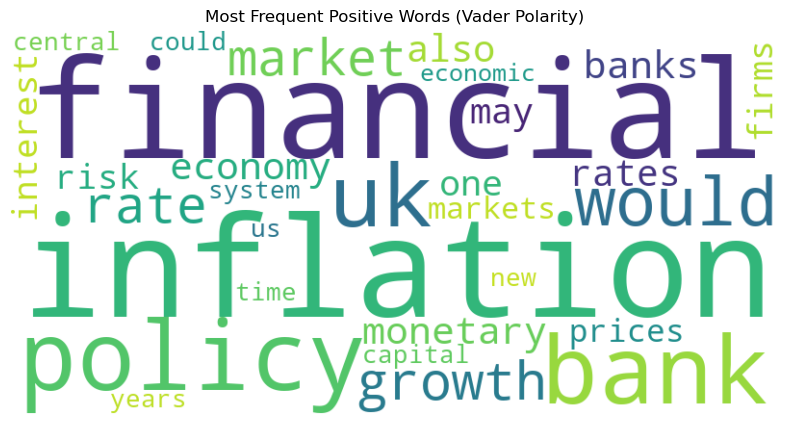

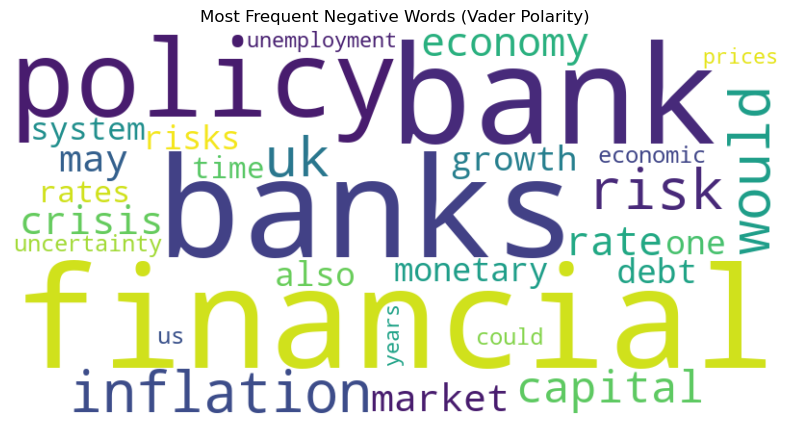

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for most frequent 30 positive words
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(vader_top_pos_words))

# Plot the word cloud for positive words
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Most Frequent Positive Words (Vader Polarity)')
plt.axis('off')
plt.show()

# Generate word cloud for most frequent 30 negative words
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(vader_top_neg_words))

# Plot the word cloud for negative words
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Most Frequent Negative Words (Vader Polarity)')
plt.axis('off')
plt.show()

## LM

#### Top 20 most positive LM words

In [11]:
# Filter the DataFrame to include only rows with positive LM polarity scores
lm_pos_words = speeches_data[speeches_data['lm_polarity'] > 0]

# Concatenate the text from the 'clean_text' column into a single string
lm_merge_pos = ' '.join(lm_pos_words['clean_text'])

# Split the merged text into words
lm_merge_pos_words = lm_merge_pos.split()

# Calculate the frequency of each word
lm_pos_word_counts = Counter(lm_merge_pos_words)

# Sort the words by frequency in descending order
lm_pos_sorted_words = sorted(lm_pos_word_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 30 LM positive words
lm_top_pos_words = lm_pos_sorted_words[:30]

# Display the top positive words
print(lm_top_pos_words)

[('financial', 3237), ('bank', 2764), ('uk', 2043), ('market', 1572), ('new', 1501), ('also', 1459), ('policy', 1454), ('data', 1401), ('firms', 1262), ('work', 1230), ('would', 1220), ('one', 1167), ('could', 1139), ('growth', 1116), ('economy', 1111), ('system', 1067), ('risks', 1065), ('stability', 1054), ('may', 1049), ('markets', 1022), ('banks', 1014), ('time', 977), ('payments', 930), ('central', 879), ('monetary', 877), ('risk', 873), ('productivity', 861), ('years', 859), ('need', 850), ('us', 828)]


#### Top 20 most negative LM words

In [12]:
# Filter the DataFrame to include only rows with negative LM polarity scores
lm_neg_words = speeches_data[speeches_data['lm_polarity'] < 0]

# Concatenate the text from the 'clean_text' column into a single string
lm_merge_neg = ' '.join(lm_neg_words['clean_text'])

# Split the merged text into words
lm_merge_neg_words = lm_merge_neg.split()

# Calculate the frequency of each word
lm_neg_word_counts = Counter(lm_merge_neg_words)

# Sort the words by frequency in descending order
lm_neg_sorted_words = sorted(lm_neg_word_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 30 LM negative words
lm_top_neg_words = lm_neg_sorted_words[:30] 

# Display the top negative words
print(lm_top_neg_words)

[('inflation', 19368), ('policy', 17611), ('financial', 16433), ('bank', 16233), ('uk', 13639), ('would', 13409), ('rate', 12271), ('growth', 12244), ('banks', 12160), ('economy', 10850), ('monetary', 10775), ('market', 10732), ('rates', 9755), ('risk', 9697), ('also', 9560), ('may', 9142), ('one', 8928), ('capital', 8534), ('interest', 8277), ('prices', 7941), ('years', 7189), ('time', 7057), ('firms', 6881), ('markets', 6856), ('us', 6642), ('could', 6599), ('system', 6445), ('central', 6303), ('crisis', 6287), ('economic', 6281)]


#### LM word clouds

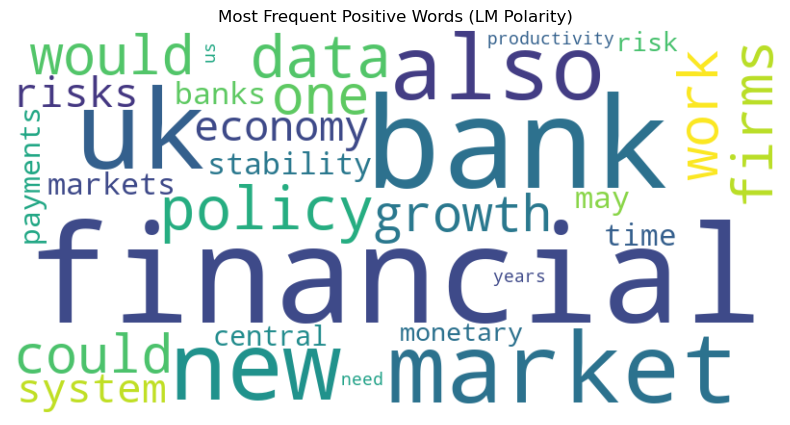

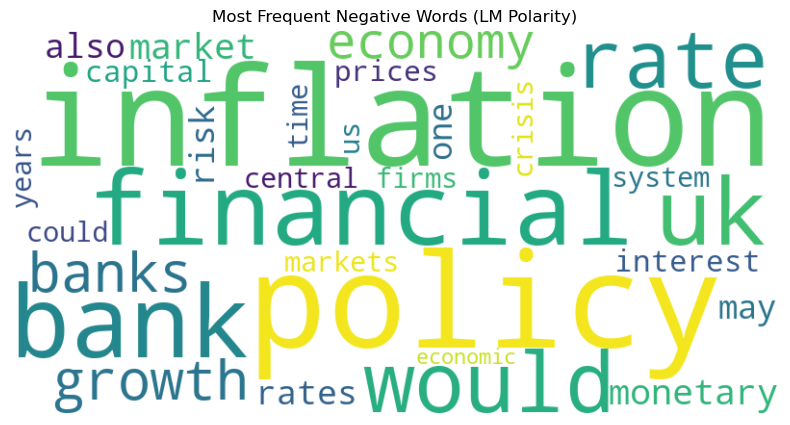

In [13]:
# Generate word cloud for most frequent positive words
wordcloud_pos_lm = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(lm_top_pos_words))

# Plot the word cloud for positive words
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos_lm, interpolation='bilinear')
plt.title('Most Frequent Positive Words (LM Polarity)')
plt.axis('off')
plt.show()

# Generate word cloud for most frequent negative words
wordcloud_neg_lm = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(lm_top_neg_words))

# Plot the word cloud for negative words
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg_lm, interpolation='bilinear')
plt.title('Most Frequent Negative Words (LM Polarity)')
plt.axis('off')
plt.show()


## FinBERT

As FinBERT is our most promising model it will need a finer analysis. 

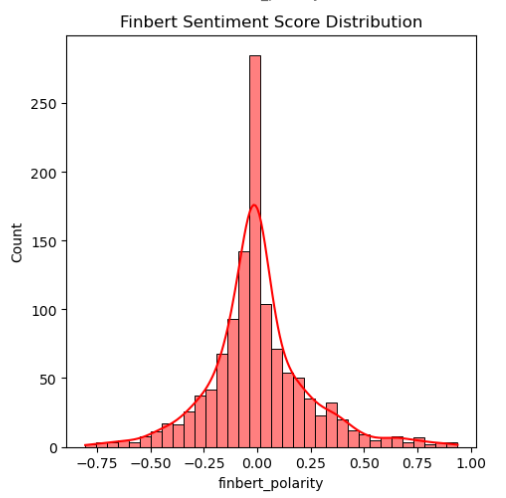

In [14]:
speeches_data['finbert_polarity'].describe()

count    1209.000000
mean        0.085165
std         0.285261
min        -0.775184
25%         0.000168
50%         0.016790
75%         0.332369
max         0.995363
Name: finbert_polarity, dtype: float64

Given the descriptive statistics and the distribution above, it seems correct to set our thresholds around the interquartile range to better capture the more clearly positive or negative sentiments. For instance:

- Negative Threshold: Could be set around the 25% quartile, say at -0, to ensure that only the speeches that are clearly negative are classified as such.
- Positive Threshold: Could be set around the 75% quartile, for example, at 0.30, to classify a speech as positive only if it has a clearly positive sentiment.

In [15]:
# Calculate the total number of positive speeches
total_positive_speeches = speeches_data[speeches_data['finbert_polarity'] > 0.3].shape[0]

# Calculate the total number of negative speeches
total_negative_speeches = speeches_data[speeches_data['finbert_polarity'] < 0].shape[0]

# Print the total number of positive and negative speeches
print("Total positive speeches:", total_positive_speeches)
print("Total negative speeches:", total_negative_speeches)


Total positive speeches: 318
Total negative speeches: 298


In [16]:
# Let's consider the average speech length to see a comparison of composition. 

# Calculate speech length as the number of words in 'clean_text'
speeches_data['speech_length'] = speeches_data['clean_text'].apply(lambda x: len(x.split()))

# Define thresholds for positive and negative speeches
threshold_positive = 0.3
threshold_negative = 0  

# Filter the DataFrame for positive and negative speeches
positive_speeches = speeches_data[speeches_data['finbert_polarity'] > threshold_positive]
negative_speeches = speeches_data[speeches_data['finbert_polarity'] < threshold_negative]

# Calculate the average length of speeches in each category
average_length_positive = positive_speeches['speech_length'].mean()
average_length_negative = negative_speeches['speech_length'].mean()

# Print the average lengths
print(f"Average length of positive speeches: {average_length_positive} words")
print(f"Average length of negative speeches: {average_length_negative} words")

Average length of positive speeches: 1988.8490566037735 words
Average length of negative speeches: 2343.288590604027 words


#### Top 30 most positive FinBERT words

In [17]:
# Filter the DataFrame to include only rows with positive FinBERT polarity scores
finbert_pos_words = speeches_data[speeches_data['finbert_polarity'] > 0.3]

# Concatenate the text from the 'clean_text' column into a single string
finbert_merge_pos = ' '.join(finbert_pos_words['clean_text'])

# Split the merged text into words
finbert_merge_pos_words = finbert_merge_pos.split()

# Calculate the frequency of each word
finbert_pos_word_counts = Counter(finbert_merge_pos_words)

# Sort the words by frequency in descending order
finbert_pos_sorted_words = sorted(finbert_pos_word_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 30 FinBERT positive words
finbert_top_pos_words = finbert_pos_sorted_words[:30]

# Display the top positive words
print(finbert_top_pos_words)

[('financial', 5495), ('inflation', 4407), ('policy', 3962), ('bank', 3947), ('uk', 3879), ('growth', 3547), ('economy', 3128), ('market', 2982), ('would', 2936), ('also', 2704), ('monetary', 2567), ('rate', 2549), ('risk', 2503), ('banks', 2394), ('may', 2322), ('firms', 2299), ('markets', 2195), ('capital', 2182), ('one', 2098), ('rates', 2074), ('new', 2045), ('risks', 2034), ('could', 2020), ('system', 1995), ('interest', 1894), ('years', 1887), ('time', 1856), ('economic', 1830), ('data', 1821), ('year', 1735)]


#### Top 30 most negative FinBERT words

In [18]:
# Filter the DataFrame to include only rows with negative FinBERT polarity scores
finbert_neg_words = speeches_data[speeches_data['finbert_polarity'] < 0]

# Concatenate the text from the 'clean_text' column into a single string
finbert_merge_neg = ' '.join(finbert_neg_words['clean_text'])

# Split the merged text into words
finbert_merge_neg_words = finbert_merge_neg.split()

# Calculate the frequency of each word
finbert_neg_word_counts = Counter(finbert_merge_neg_words)

# Sort the words by frequency in descending order
finbert_neg_sorted_words = sorted(finbert_neg_word_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 30 FinBERT negative words
finbert_top_neg_words = finbert_neg_sorted_words[:30]

# Display the top negative words
print(finbert_top_neg_words)


[('inflation', 5438), ('financial', 5071), ('policy', 5061), ('uk', 4884), ('growth', 4630), ('bank', 4538), ('would', 4088), ('banks', 4076), ('economy', 3975), ('rate', 3404), ('market', 3179), ('monetary', 3153), ('rates', 2967), ('may', 2801), ('prices', 2795), ('also', 2790), ('risk', 2474), ('one', 2451), ('capital', 2373), ('crisis', 2245), ('years', 2236), ('markets', 2210), ('interest', 2205), ('could', 2170), ('around', 2107), ('year', 2095), ('time', 2090), ('economic', 2074), ('demand', 2062), ('global', 2026)]


#### FinBERT word clouds

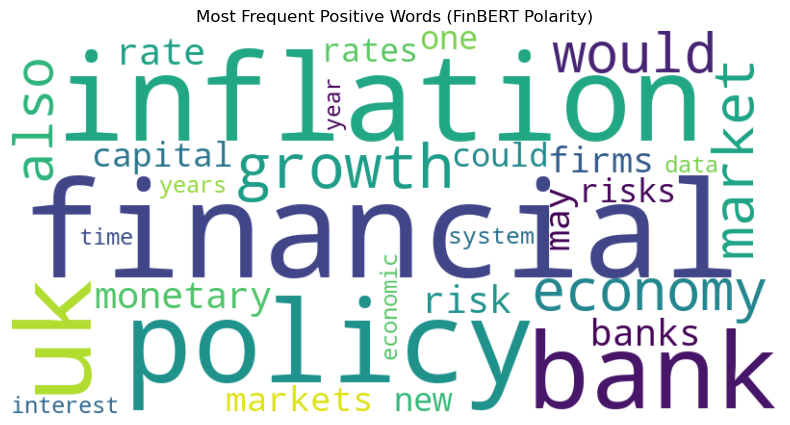

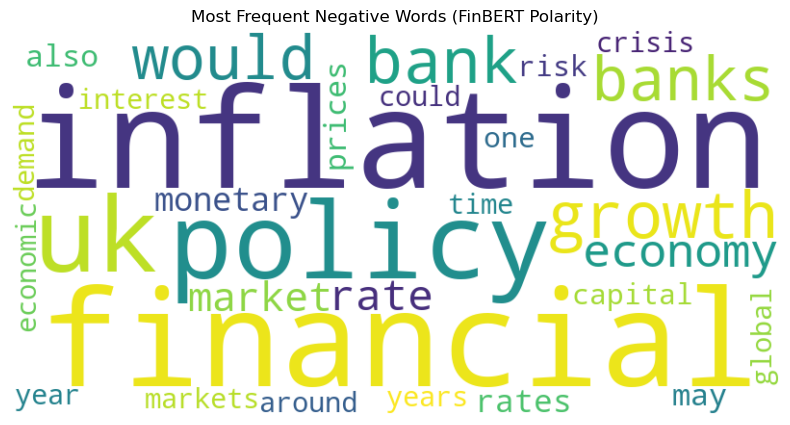

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for most frequent positive words
wordcloud_pos_finbert = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(finbert_top_pos_words))

# Plot the word cloud for positive words
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos_finbert, interpolation='bilinear')
plt.title('Most Frequent Positive Words (FinBERT Polarity)')
plt.axis('off')
plt.show()

# Generate word cloud for most frequent negative words
wordcloud_neg_finbert = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(finbert_top_neg_words))

# Plot the word cloud for negative words
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg_finbert, interpolation='bilinear')
plt.title('Most Frequent Negative Words (FinBERT Polarity)')
plt.axis('off')
plt.show()

### FinBERT word cloud analysis

##### Positive Sentiment Insights
Unique Positive Words
- Risks (2034): Often discussed in a context that emphasises managing or mitigating financial risks, which might be viewed positively as proactive or cautious.
- Firms (2299): Likely refers to businesses and their activities or performance, which in a positive sentiment could relate to growth, innovation, or contribution to the economy.
- New (2045): Indicates forward-looking or innovative aspects, such as new policies, technologies, or initiatives, seen as beneficial or promising.
- System (1995): Could relate to the financial system or specific systems within banking and finance, suggesting stability, robustness, or efficiency.
- Data (1821): Points to the use of data in making informed decisions or analysis, highlighting transparency, accuracy, or advancement in banking practices.

More frequent positive words (>=500):
- There weren't any.

##### Negative Sentiment Insights
Unique Negative Words
- Prices (2795): Could be associated with inflation or rising costs, leading to negative sentiment regarding economic pressure or living costs.
- Global (2026): Refers to global challenges, crises, or economic conditions that negatively impact the UK or the global economy.
- Crisis (2245): Directly related to financial crises, uncertainties, or significant negative economic events. Which is appropriate given the tumultuous period of the data. 
- Demand (2062): In a negative context, could relate to decreasing demand, economic slowdowns, or challenges in meeting demand.
- Around (2107): Usage might be in contexts discussing uncertainties or concerns surrounding various economic factors.

More frequent negative words (>=500) The numbers are the amounts by which these words appear more frequently in the negative section compared to the positive section
- Would (1152): Often used in speculating about negative outcomes or uncertainties, particularly in discussing adverse future scenarios.

- Inflation (1031): Central in discussions about the negative impacts on purchasing power, increased cost of living, and overall economic pressures.

- Policy (1099): Refers to government or monetary policies that may be viewed unfavorably or blamed for adverse economic conditions.

- UK (1005): Concerns specifically impacting the United Kingdom, such as Brexit, economic policies, or national financial challenges.

- Growth (1083): Could be discussed in terms of slowdowns, reduced forecasts, or stagnant conditions that affect economic sentiments negatively.

- Banks (1682): Discussions likely focus on challenges, failures, or issues within the banking institutions.

- Economy (847): Refers to downturns, recessions, or overall negative health of the economy.

- Rates (893): Discusses the broader implications of changes in interest rates on mortgages, loans, and economic growth.

- Rate (855): Involves interest rates, particularly increases which may suggest tightening monetary policy or concerns about inflation.

- Bank (591): Focuses on specific problems associated with banks or the banking sector as a whole.

- Monetary (586): Involves discussions on monetary policy that in a negative context could relate to criticisms or constraints of current policy measures.

#### Recommendations:
Positive Sentiment Triggers
- Proactivity and Management: Words like "risks," "system," and "data" are associated with proactive management and positive actions. These suggest efforts to ensure stability and thoughtful, informed decision-making.
- Innovation and Progress: Terms such as "new" and "firms" highlight forward-thinking, innovation, and positive contributions to the economy. They evoke a sense of progress and development.


Negative Sentiment Triggers
- Economic Challenges: Words like "inflation," "crisis," and "rates" often appear in contexts discussing economic pressures and challenges, which naturally tend to generate negative sentiments.
- Speculative and Uncertain Language: Use of words like "would" and "could" can introduce uncertainty and speculation, often associated with less positive or anxious sentiments.
- Banking and Policy Concerns: Terms such as "banks," "policy," and "monetary" can evoke negative sentiments when linked to problems or criticisms of banking practices and economic policies.

Final observation:
- Addressing Sentiment Imbalance: The lesser frequency of positive terms suggests a potential negative skew in communication. Increasing the use of positive words can help foster a more optimistic public perception, balancing the narrative around economic conditions.